# **Artificial Neural Networks: Street View Housing Number Digit Recognition**


### **Context:** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains labeled digits cropped from street level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

### **Objective:**
----------------

Build a feed foward neural network model that can identify the digits in the images. 

### **Note:**
----------------
ANN is not the best choice to deal with image data. CNN's has proven much better performance. This notebook is just for practice.

## **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical

## **Load the dataset**
- Let us now load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [2]:
import h5py

# Open the file as read only
h5f = h5py.File('Part - 2 - Autonomous_Vehicles_SVHN_single_grey1 (1) (2).h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

Let's check the number of images in the training and testing data.

In [3]:
len(X_train), len(X_test),X_train.shape, X_test.shape

(42000, 18000, (42000, 32, 32), (18000, 32, 32))

- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**
- Use X_train to visualize the first 10 images
- Use Y_train to print the first 10 labels

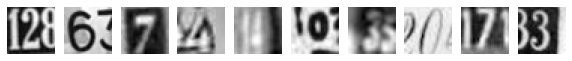

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [4]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

In [5]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [6]:
# Reshaping the dataset to flatten them. Remember that we are trying to reshape the 2D image data into a 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

In [7]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255
X_test = X_test/255

In [8]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [9]:
# one hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print(X_train.shape)
print(y_train.shape)

(42000, 1024)
(42000, 10)


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

In [11]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

#### **Build and train a ANN model**

In [12]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_1():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1024, )),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
    ]) 
    
    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate=0.001)
    
    #compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics = ['accuracy'])
    return model

In [13]:
# Build the model
model_1 = nn_model_1()

In [14]:
#Print the summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Fit the model
history_model_1 = model_1.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=128, verbose = 1)

Epoch 1/20
263/263 [==============================] - 3s 4ms/step - loss: 2.3002 - accuracy: 0.1158 - val_loss: 2.2724 - val_accuracy: 0.1525
Epoch 2/20
263/263 [==============================] - 1s 2ms/step - loss: 2.1415 - accuracy: 0.2150 - val_loss: 1.9769 - val_accuracy: 0.3170
Epoch 3/20
263/263 [==============================] - 1s 2ms/step - loss: 1.8248 - accuracy: 0.3685 - val_loss: 1.6844 - val_accuracy: 0.4274
Epoch 4/20
263/263 [==============================] - 1s 2ms/step - loss: 1.6018 - accuracy: 0.4688 - val_loss: 1.5136 - val_accuracy: 0.5038
Epoch 5/20
263/263 [==============================] - 1s 2ms/step - loss: 1.4689 - accuracy: 0.5206 - val_loss: 1.4363 - val_accuracy: 0.5243
Epoch 6/20
263/263 [==============================] - 1s 2ms/step - loss: 1.3996 - accuracy: 0.5480 - val_loss: 1.3818 - val_accuracy: 0.5523
Epoch 7/20
263/263 [==============================] - 1s 2ms/step - loss: 1.3516 - accuracy: 0.5640 - val_loss: 1.3287 - val_accuracy: 0.5729
Epoch 

### **Plotting the validation and training accuracies**

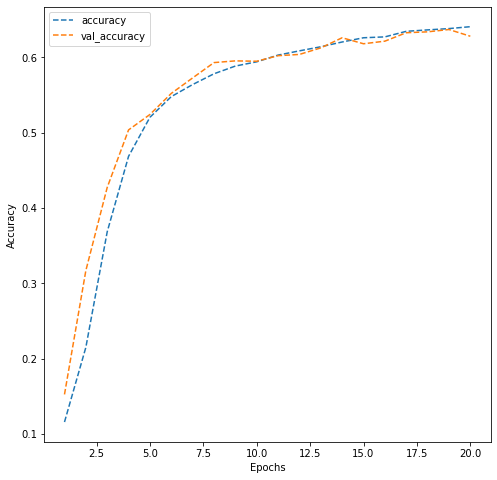

In [16]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:_______**
- The Accuracy of both training and validation is almost symetric. This is a good indicator that the model is not overfitting the training dataset.
- The Accuracy starts to increase steadily until epoch 6, then it increases in a lower rate until epoch 17 where we observe minimum increase afterward.
- We can see that the accuracy of validation dataset is slightly higher than the training dataset until epoch 10, where they start replacing places. This could give a sign that the model starts to fit the training dataset better, but not to the point of overfitting yet.
- Overall, the model is not overfit and is giving accuracy of 0.7 on training dataset and roughly the same on validation dataset.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

In [17]:
#Clearing keras backend
from tensorflow.keras import backend
backend.clear_session()

In [18]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

#### **Build and train the new ANN model as per the above mentioned architecture**

In [19]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_2():
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(256, activation='relu', input_shape=(1024, )),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(rate = 0.2),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, activation = 'softmax')             
    ]) 
    
    #declare adam optimizer with learning rate of 0.0005 
    adam = optimizers.Adam(learning_rate=0.0005)
    
    #compile the model
    model.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics= ['accuracy'])
    
    return model

In [20]:
# Build the model
model_2 = nn_model_2()

In [21]:
#Print the model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [22]:
# Fit the model
history_model_2 = model_2.fit(X_train,y_train, epochs=30, validation_split=0.2, batch_size=128, verbose = 1)

Epoch 1/30
263/263 [==============================] - 8s 6ms/step - loss: 2.3439 - accuracy: 0.1084 - val_loss: 2.2681 - val_accuracy: 0.1519
Epoch 2/30
263/263 [==============================] - 2s 6ms/step - loss: 2.0457 - accuracy: 0.2491 - val_loss: 1.7949 - val_accuracy: 0.4082
Epoch 3/30
263/263 [==============================] - 1s 6ms/step - loss: 1.5904 - accuracy: 0.4590 - val_loss: 1.4408 - val_accuracy: 0.5129
Epoch 4/30
263/263 [==============================] - 1s 6ms/step - loss: 1.3642 - accuracy: 0.5494 - val_loss: 1.2375 - val_accuracy: 0.6062
Epoch 5/30
263/263 [==============================] - 1s 6ms/step - loss: 1.2227 - accuracy: 0.6083 - val_loss: 1.2034 - val_accuracy: 0.6120
Epoch 6/30
263/263 [==============================] - 1s 6ms/step - loss: 1.1508 - accuracy: 0.6335 - val_loss: 1.0818 - val_accuracy: 0.6526
Epoch 7/30
263/263 [==============================] - 1s 6ms/step - loss: 1.0849 - accuracy: 0.6567 - val_loss: 1.0639 - val_accuracy: 0.6560
Epoch 

### **Plotting the validation and training accuracies**

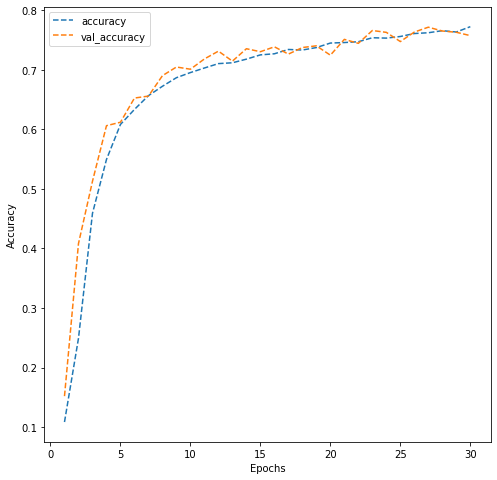

In [23]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:_______**
- Accuracy of both training dataset and validation dataset is symetric to some level. This rejects any overfitting concerns.
- Accuracy of both is growing rapidly as the model progresses with epochs to 8, then accuracy still improves, but slowly.
- After epoch 7 we can see small ups and downs in the validation dataset accuracy. This is not a concern as the overall trend is positive.
- Overall the model is better than the previous with accuracy of 0.77 compared to 0.70.


## **Predictions on the test data**

In [24]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

563/563 [==============================] - 2s 1ms/step


In [25]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

#### **Print the classification report and the confusion matrix**

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1814
           1       0.76      0.80      0.78      1828
           2       0.68      0.84      0.75      1803
           3       0.64      0.76      0.69      1719
           4       0.78      0.85      0.82      1812
           5       0.74      0.71      0.72      1768
           6       0.85      0.66      0.74      1832
           7       0.83      0.76      0.79      1808
           8       0.72      0.70      0.71      1812
           9       0.77      0.71      0.74      1804

    accuracy                           0.75     18000
   macro avg       0.76      0.75      0.75     18000
weighted avg       0.76      0.75      0.75     18000



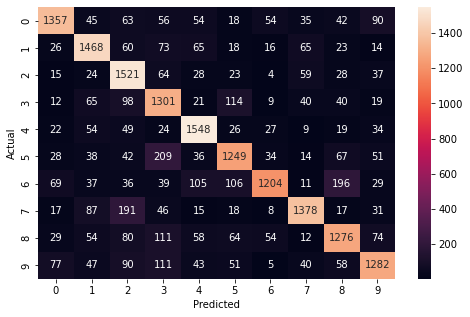

In [26]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### **Observations:__________**
 - The classification report tells us that numbers 0 and 4 have the highest f1-score (0.81) meaning they have the best chances of being accurately recognized. Whereas, numbers 3 and 8 have the lowest f1-score of (0.77).
 - Number 3 has the lowest precision and 0 has the highest, this means that the model is classifing other numbers as 3 which not valid. Whereas 0 has the lowest chances of being invalidly positive.
 - Number 4 has the highest recall, whereas 5 and 6 have the lowest. It indicates that the model is struggling to identify all 5's and 6's as what they are. Opposed to 4, which the model idenifies in high rates of completion. 
 - The confusion matrix shows that the model confused 5 with 3 and 6 with 8. This complements the above obervations about 3, 5 and 6. which assures that they are having some prediction issues in general.
